## 1. 텍스트 분석을 바탕으로 한 서비스 또는 분석 프로젝트를 하나 제안해보세요. 
(목적, 데이터 유형, 분석 방법, 기대효과 등) 여기서 제시한 서비스 또는 분석 프로젝트를 바탕으로 중간고사 문제를 풉니다

- 프로젝트 : 텍스트 기반 영상 내용 검색
- 데이터 유형 : 영상, 음향, 텍스트
- 분석 방법
  1. 동영상의 음성 정보를 STT로 변환한다.
  2. 변환된 문장을 Sentence Bert 모델로 임베딩한다.
  3. 변환된 임베딩 벡터를 색인한다.
  4. 색인된 정보를 벡터 기반 검색하여 영상의 내용을 검색한다.
- 기대효과
  - 단순히 영상 제목이 아닌 사용자가 원하는 내용 기반 검색을 가능하도록한다.
  - 제목에서의 궁금증을 영상을 끝까지 보지 않아도 확인 가능하다
    - 예시 : "코로나vs독감vs감기 의사들이 구별하는 방법은?"

## 2. PROJECT를 위한 데이터 수집 방안을 제시해보세요.
  - 내용 검색을 하고자 하는 동영상을 수집한다.
  - 수집된 영상의 음성 데이터를 텍스트로 변환하여 텍스트 데이터를 추출한다.

## 3. 2번의 수집 방안과는 별개로, 중간고사 자체를 위한 데이터를 수집합니다. 여기서 수집한 데이터를 바탕으로 중간고사 문제를 풉니다
(이 데이터는 이하 DATA라고 칭합니다) 뉴스 웹스크래핑 또는 음성 인식을 통해 간단하게 1번에서 제시한 서비스/프로젝트를 위한 데이터를 수집해보세요. 데이터는 한국어로 수집하세요.


url requests 확인

In [1]:
import requests
url = 'https://youtu.be/VSDqHWbybFw'
res = requests.get(url)
res

<Response [200]>

In [2]:
!pip install cssselect
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


youtube 영상 다운로드

In [3]:
!pip3 install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pytube

yt = pytube.YouTube('https://youtu.be/zydCxuOs-34?t=1')
yt.streams.get_highest_resolution().download("./")

'/content/./[PEOPLE in 세브란스] 감기 vs 코로나19증상 어떻게 다른가.mp4'

STT

In [5]:
!pip install -U openai-whisper kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import unicodedata

import tqdm
import whisper
from kiwipiepy import Kiwi

model = whisper.load_model("medium")
kiwi = Kiwi()

In [7]:
import glob
filelist = glob.glob('/content/./*.mp4')

In [8]:
filelist

['/content/./[날씨] 아침 쌀쌀 내륙 산지 서리·얼음‥낮부터 따뜻 (20230426뉴스데스크MBC).mp4',
 '/content/./[PEOPLE in 세브란스] 감기 vs 코로나19증상 어떻게 다른가.mp4']

In [9]:
for filename in filelist:
    print("filename :", filename)
    result = model.transcribe(filename, language='ko') # 음성 인식
    print("result :", filename)
    sents = kiwi.split_into_sents(result['text'])  # 문장 단위로 자르기
    print("sents :", filename)
    text = '\n\n'.join(sent.text for sent in sents) # 하나로 합치기
    print(text)
    txt_name = "/content/./savefile.txt"
    txt_name = unicodedata.normalize('NFC', txt_name) # NFC로 노말라이즈
    with open(txt_name, "w") as f:
        f.write("contents\n")
        f.write(text)

filename : /content/./[날씨] 아침 쌀쌀 내륙 산지 서리·얼음‥낮부터 따뜻 (20230426뉴스데스크MBC).mp4
result : /content/./[날씨] 아침 쌀쌀 내륙 산지 서리·얼음‥낮부터 따뜻 (20230426뉴스데스크MBC).mp4
sents : /content/./[날씨] 아침 쌀쌀 내륙 산지 서리·얼음‥낮부터 따뜻 (20230426뉴스데스크MBC).mp4
날씨였습니다.

햇살에 비춰도 바람결이 차갑습니다.

오늘 해발구도 1500m 이상의 덕유산 정상부에는 하얀 눈꽃도 내려앉았습니다.

아침 기온이 영하 3.3도까지 떨어져 상고대가 생겨나 이렇게 봄꽃들을 뒤덮은 모습인데요.

밤사이도 찬 공기가 계속 머무르면서 내륙 산지의 기온은 0도 안팎까지 떨어지겠고요.

또 출근길 서울의 기온도 7도까지 떨어졌을 사람이 감돌겠습니다.

낮부터는 따뜻한 남서풍이 불어들 텐데요.

다만 낮과 밤의 기온 차이가 20도 안팎으로 매우 심해지겠습니다.

자세한 지역별 내일 날씨입니다.

내일은 전국의 하늘이 종이 맑겠고 오후부터 강원 영동 지방은 바람이 강해지겠습니다.

또 출근길에는 중부 내륙과 경북 북부 내륙을 중심으로 가시거리 200m 미만의 짙은 안개가 끼겠습니다.

아침 최저 기온은 오늘보다 낮겠는데요.

낮은 기온은 서울 27도, 춘천 4도, 안동 3도를 보이겠고요.

낮 최고 기온은 오늘보다 2도에서 6도가량 높겠습니다.

서울 20도, 강릉 24도, 대구와 광주는 23도를 보이겠습니다.

이번 주말에는 전국에서 다시 비가 내리겠는데요.

비는 금요일 저녁 제주를 시작으로 토요일에는 서울 등 전국으로 확대될 전망입니다.

날씨였습니다.
filename : /content/./[PEOPLE in 세브란스] 감기 vs 코로나19증상 어떻게 다른가.mp4
result : /content/./[PEOPLE in 세브란스] 감기 vs 코로나19증상 어떻게 다른가.mp4
sents : /content/./[PEOPLE in 세브란스] 감기 v

# 4. DATA를 바탕으로 문서단어행렬을 그리고, 단어구름으로 시각화해보세요. 
분석 결과를 설명해보세요.

In [10]:
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [11]:
import pandas as pd
df = pd.read_csv('/content/savefile.txt', delimiter = "\t")
df.head()

,contents
0,안녕하세요 세브런스병원 진단검사의 의학과학과 이영민입니다
1,감기하고 코로나바이러스는 사실 구분하기가 쉽지 않은데요
2,왜냐면 우리가 겨울철에 발생하는 감기라고 부르는 질환 자체가 코로나바이러스에 의한 ...
3,저희가 코로나바이러스를 의심할 수 있는 증상으로 초기에 38도 이상의 고열 호흡곤란...
4,하지만 중국의 데이터에 따르면 전체 환자의 20% 정도만이 38도 이상의 고열을 보...


문서단어행렬

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns)
dtm = cv.fit_transform(df.contents)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
dtm.shape

(16, 110)

In [14]:
cv.get_feature_names_out()

array(['가능', '감기', '감별', '감염', '감염자', '건강', '검사', '겨울철', '경우', '고려', '고령',
       '곤란', '공격', '공유', '과', '과학', '관', '관계', '구분', '국가', '기저', '기전',
       '나라', '난', '남녀노소', '내벽', '냄새', '농증', '당뇨', '대부분', '데이터', '동일', '때',
       '만성', '말씀', '미만', '반응', '발생', '발열', '발현', '별도', '병원', '보고', '보통',
       '복합', '비율', '사람', '사회', '상호', '생각', '선별', '세브런스', '세포', '아노스미아',
       '안녕하세요', '알코', '양상', '연관', '연구', '연령', '열', '외국', '우리나라', '위험',
       '의심', '의학', '이상', '이영민', '이유', '이후', '인후', '일부', '입증', '자체', '작용',
       '장애', '적용', '전', '전체', '절반', '정도', '조사', '조선', '조심', '중국', '중증',
       '증상', '진단', '진행', '질환', '질환자', '차지', '초기', '최근', '충', '코로나',
       '코로나바이러스', '통', '통상', '특성', '필요', '합병', '향후', '현실', '혈관', '혈압',
       '형태', '호흡', '확인', '환자'], dtype=object)

In [15]:
dtm.sum(axis=0)

matrix([[ 2,  4,  2,  6,  1,  1,  1,  1,  6,  1,  1,  2,  1,  1,  1,  1,
          1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  4,  1,  6,  1,  3,  1,
          1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  2,  1,
          1,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,  3,
          1,  1,  3,  1,  1,  2,  2,  4,  1,  1,  1,  1,  1,  2,  3,  1,
          5,  1,  1,  3,  1,  2, 12,  1,  2,  4,  1,  1,  1,  1,  1, 11,
          3,  2,  1,  1,  1,  1,  1,  2,  3,  1,  1,  2,  1,  5]])

In [16]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

In [17]:
word_count.sort_values('빈도', ascending=False).head(20)

,단어,빈도
86,증상,12
95,코로나,11
28,당뇨,6
3,감염,6
8,경우,6
80,정도,5
109,환자,5
1,감기,4
71,일부,4
89,질환,4


단어구름

In [18]:
!apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

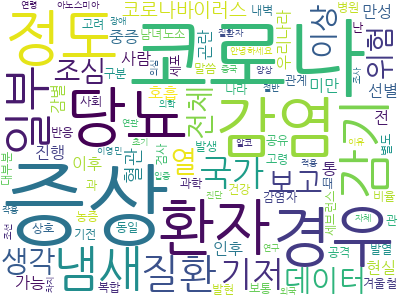

In [19]:
from wordcloud import WordCloud

wc = WordCloud(
  font_path='NanumGothic.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  max_words=100,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기

count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)
cloud.to_image()

#5. 4번의 분석 결과를 PROJECT에 어떻게 할용할 수 있는지 설명하세요.
- 영상의 제목은 "감기vs코로나19의 다른점"이다.
- 현재 분석 결과로 감기 또는 코로나19는 "당뇨, 냄새, 혈관" 키워드와 연관이 있다. 

#6. DATA를 바탕으로 토픽 모델링을 실시하세요. LSA, NMF, LDA, SBERT를 이용한 키워드 추출을 해보고, 가장 적절한 방법을 고르세요.


In [20]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

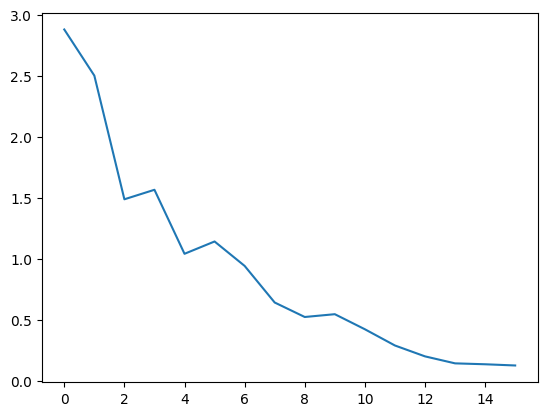

In [21]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

##LSA

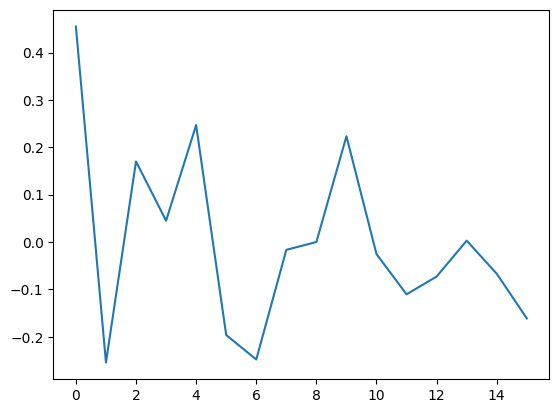

In [22]:
word_emb = svd.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('증상')

plt.plot(word_emb[i])

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

현실
발생
자체
대부분
공유
겨울철
경우
환자
호흡
인후


In [24]:
indices = []
target = ['코로나', '감기', '증상', '당뇨', '냄새', '혈관']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

코로나 95
감기 1
증상 86
당뇨 28
혈관 104


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [25]:
!pip install adjusttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

6

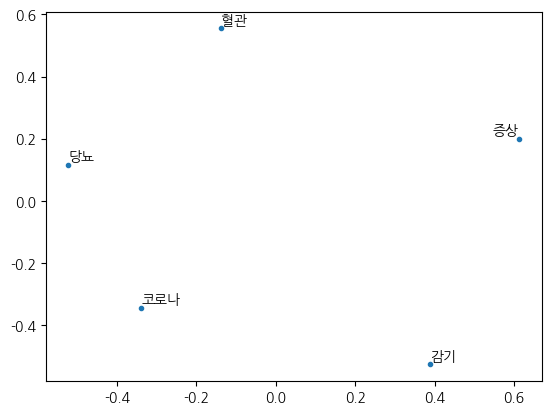

In [27]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [28]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


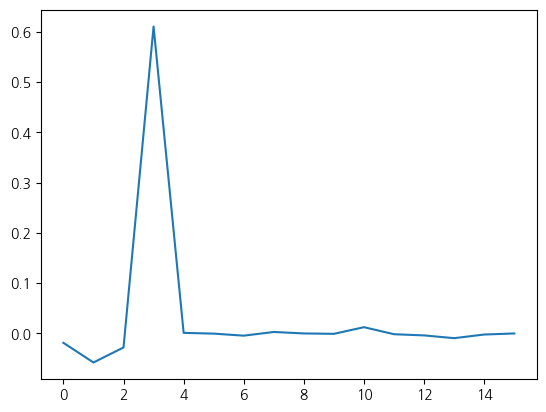

In [29]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()
rot = rotator.fit_transform(word_emb)

plt.plot(rot[i])

In [30]:
t = np.argmax(rot[i])

topic_words_idx = np.argsort(rot[:, t])

for j in topic_words_idx[-1:-11:-1]:
    print(words[j])

혈관
당뇨
장애
특성
반응
세포
내벽
기전
작용
복합


##NMF

In [31]:
from sklearn.decomposition import NMF
NUM_TOPICS = 8
nmf = NMF(n_components=NUM_TOPICS)
doc_emb = nmf.fit_transform(dtm)

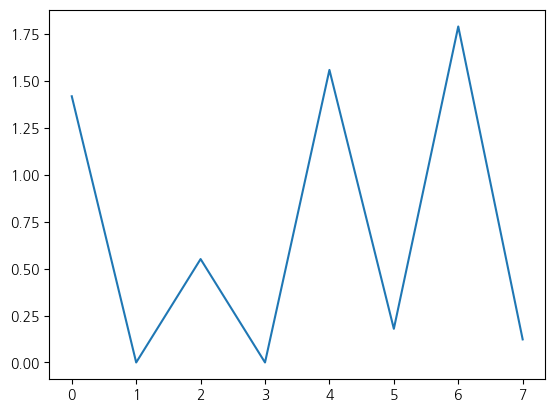

In [32]:
word_emb = nmf.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('증상')

plt.plot(word_emb[i])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

경우
감별
환자
냄새
구분
국가
감기
현실
의심
초기


In [34]:
indices = []
target = ['코로나', '감기', '증상', '당뇨', '냄새', '혈관']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

코로나 95
감기 1
증상 86
당뇨 28
혈관 104


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


6

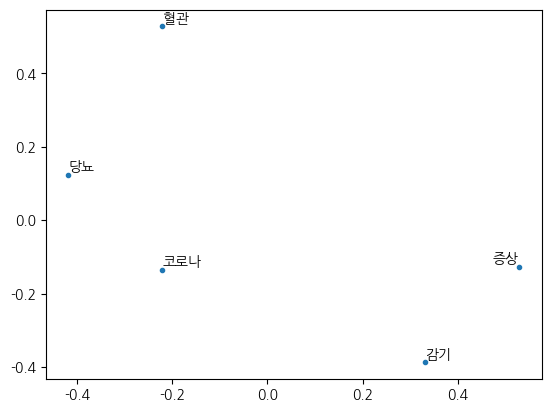

In [35]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [36]:
for t in range(NUM_TOPICS):
    print(t)
    topic_words_idx = np.argsort(rot[:, t])

    for j in topic_words_idx[-1:-11:-1]:
        print(words[j])

0
일부
냄새
경우
보고
감기
증상
이상
감염자
충
절반
1
당뇨
진행
코로나
형태
상호
알코
관
외국
연구
연관
2
전
조심
향후
확인
필요
말씀
조선
입증
고려
질환자
3
혈관
당뇨
장애
특성
반응
세포
내벽
기전
작용
복합
4
증상
인후
통
곤란
호흡
의심
초기
이상
감별
열
5
열
정도
미만
중국
발열
선별
데이터
이상
환자
전체
6
우리나라
국가
비율
적용
보통
별도
발현
조사
나라
생각
7
조심
연령
기저
질환
구분
경우
환자
혈관
감별
호흡


In [37]:
doc_id = 1

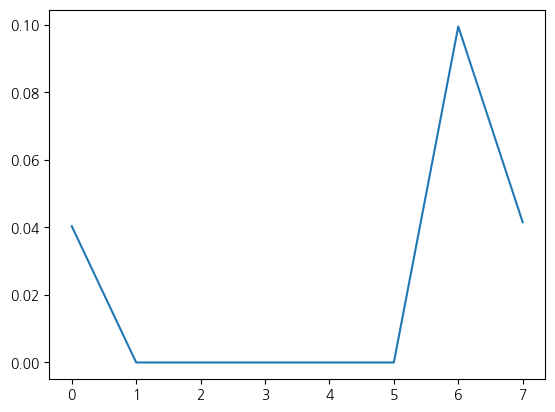

In [38]:
plt.plot(doc_emb[doc_id])

In [39]:
topic_id = np.argmax(doc_emb[doc_id])
topic_id

6

감기와 연관이 가장 강한 토픽 내용

In [40]:
topic_docs_idx = np.argsort(doc_emb[:,topic_id])[-1:-11:-1]
df.iloc[topic_docs_idx]

,contents
5,그리고 인후통과 호흡곤란의 경우에서도 대략 20% 각각 20% 미만의 환자들만의 증...
3,저희가 코로나바이러스를 의심할 수 있는 증상으로 초기에 38도 이상의 고열 호흡곤란...
2,왜냐면 우리가 겨울철에 발생하는 감기라고 부르는 질환 자체가 코로나바이러스에 의한 ...
1,감기하고 코로나바이러스는 사실 구분하기가 쉽지 않은데요
9,특히 무증상 감염이 전체 환자의 50% 정도를 차지하기 때문에 우리도 알지 못하는 ...
15,그래서 이런 것들을 고려했을 때 조금 전에 말씀드렸던 위험조선을 갖고 있는 그러한 ...
14,그리고 이런 코로나19와 당뇨와의 관계는 최근 외국에서 코로나19를 알코난 건강한 ...
13,당뇨가 위험한 이유는 코로나19의 기전에 대해서는 아직까지 명확하게 다 알려져 있지...
12,기저질환 중에서는 당뇨가 가장 위험한 것으로 알려져 있고 그 외에 고혈압이나 다른 ...
11,"그중에서 연령이 많으신 분들, 기저질환을 갖고 계신 분들은 당연히 조심을 하셔야 됩니다"


패턴이 가장 비슷한 내용

In [41]:
sims = cosine_similarity(doc_emb[[doc_id]], doc_emb).flatten()
sim_idx = np.argsort(sims)[-1:-11:-1]
df.iloc[sim_idx]

,contents
1,감기하고 코로나바이러스는 사실 구분하기가 쉽지 않은데요
2,왜냐면 우리가 겨울철에 발생하는 감기라고 부르는 질환 자체가 코로나바이러스에 의한 ...
5,그리고 인후통과 호흡곤란의 경우에서도 대략 20% 각각 20% 미만의 환자들만의 증...
3,저희가 코로나바이러스를 의심할 수 있는 증상으로 초기에 38도 이상의 고열 호흡곤란...
0,안녕하세요 세브런스병원 진단검사의 의학과학과 이영민입니다
12,기저질환 중에서는 당뇨가 가장 위험한 것으로 알려져 있고 그 외에 고혈압이나 다른 ...
6,"다만 최근 들어서 일부 국가에서 냄새를 맡지 못하는, 아노스미아라고 부르는 증상이 ..."
11,"그중에서 연령이 많으신 분들, 기저질환을 갖고 계신 분들은 당연히 조심을 하셔야 됩니다"
9,특히 무증상 감염이 전체 환자의 50% 정도를 차지하기 때문에 우리도 알지 못하는 ...
8,코로나19에 감염될 가능성은 남녀노소를 가리지 않고 다 동일합니다


In [42]:
sims[sim_idx]

array([1.        , 0.94503704, 0.88302553, 0.86007748, 0.36086321,
       0.35988378, 0.35051857, 0.34516659, 0.11933174, 0.03037307])

##LDA

In [43]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from gensim.matutils import Sparse2Corpus
words = cv.get_feature_names_out().tolist()
corpus = Sparse2Corpus(dtm.T)
id2word = dict(enumerate(words))

In [45]:
corpus[0]

[(6, 1),
 (14, 1),
 (15, 1),
 (41, 1),
 (51, 1),
 (54, 1),
 (65, 1),
 (67, 1),
 (87, 1)]

In [46]:
from gensim.models.ldamodel import LdaModel
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    iterations=400,
    alpha='auto',
    eta='auto',
    per_word_topics=True)

In [47]:
lda_model.show_topic(1)

[('코로나', 0.078641206),
 ('당뇨', 0.059223592),
 ('정도', 0.059223592),
 ('열', 0.03980596),
 ('진행', 0.03980596),
 ('상호', 0.0203883),
 ('외국', 0.0203883),
 ('연구', 0.0203883),
 ('관계', 0.020388298),
 ('연관', 0.020388298)]

In [48]:
lda_model.show_topics()

[(13,
  '0.009*"장애" + 0.009*"전" + 0.009*"입증" + 0.009*"자체" + 0.009*"작용" + 0.009*"인후" + 0.009*"적용" + 0.009*"정도" + 0.009*"절반" + 0.009*"이유"'),
 (17,
  '0.009*"장애" + 0.009*"전" + 0.009*"입증" + 0.009*"자체" + 0.009*"작용" + 0.009*"인후" + 0.009*"적용" + 0.009*"정도" + 0.009*"절반" + 0.009*"이유"'),
 (2,
  '0.009*"장애" + 0.009*"전" + 0.009*"입증" + 0.009*"자체" + 0.009*"작용" + 0.009*"인후" + 0.009*"적용" + 0.009*"정도" + 0.009*"절반" + 0.009*"이유"'),
 (8,
  '0.009*"장애" + 0.009*"전" + 0.009*"입증" + 0.009*"자체" + 0.009*"작용" + 0.009*"인후" + 0.009*"적용" + 0.009*"정도" + 0.009*"절반" + 0.009*"이유"'),
 (6,
  '0.009*"장애" + 0.009*"전" + 0.009*"입증" + 0.009*"자체" + 0.009*"작용" + 0.009*"인후" + 0.009*"적용" + 0.009*"정도" + 0.009*"절반" + 0.009*"이유"'),
 (19,
  '0.123*"구분" + 0.123*"코로나바이러스" + 0.123*"감기" + 0.007*"조심" + 0.007*"연령" + 0.006*"기저" + 0.006*"질환" + 0.006*"작용" + 0.006*"장애" + 0.006*"전"'),
 (15,
  '0.174*"질환" + 0.117*"기저" + 0.060*"위험" + 0.060*"중증" + 0.060*"혈압" + 0.060*"만성" + 0.060*"당뇨" + 0.060*"연령" + 0.059*"조심" + 0.003*"장애"'),
 (14,
  '0.054*"증상" + 0.

In [49]:
word_idx = words.index('증상')
lda_model.get_term_topics(word_idx)

[(5, 0.06849221),
 (7, 0.0217073),
 (10, 0.0930415),
 (12, 0.043407694),
 (14, 0.031987738),
 (18, 0.09844907)]

In [50]:
doc_idx = 1
lda_model.get_document_topics(corpus[doc_idx])

[(1, 0.015713979),
 (10, 0.0124062225),
 (14, 0.012114394),
 (15, 0.012060189),
 (19, 0.8243059)]

In [51]:
lda_model.log_perplexity(corpus)

-5.470320105263331

In [52]:
topn = 25
top_words = set()

for topic in range(lda_model.num_topics):
    for word, prob in lda_model.show_topic(topic, topn=topn):
        top_words.add(word)

len(top_words) / (lda_model.num_topics * topn)

0.206

In [53]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary()
dic.id2token = id2word
dic.token2id = {w: i for i, w in id2word.items()}

In [55]:
import pyLDAvis.gensim
p = pyLDAvis.gensim.prepare(lda_model, corpus, dic, sort_topics=False)
pyLDAvis.display(p)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


TypeError: ignored

##BERT

In [56]:
!pip install sentence_transformers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
doc_emb = model.encode(df['contents'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

doc_idx = 1
dists = cosine_distances(doc_emb[[doc_idx]], doc_emb).flatten()
df.iloc[np.argsort(dists)[:10]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contents
1,감기하고 코로나바이러스는 사실 구분하기가 쉽지 않은데요
2,왜냐면 우리가 겨울철에 발생하는 감기라고 부르는 질환 자체가 코로나바이러스에 의한 ...
6,"다만 최근 들어서 일부 국가에서 냄새를 맡지 못하는, 아노스미아라고 부르는 증상이 ..."
10,하지만 이 코로나19에 감염된 이후에 양상은 여러 가지 것들에 따라 달라지게 되는데요
15,그래서 이런 것들을 고려했을 때 조금 전에 말씀드렸던 위험조선을 갖고 있는 그러한 ...
5,그리고 인후통과 호흡곤란의 경우에서도 대략 20% 각각 20% 미만의 환자들만의 증...
7,보통은 젊은 환자들의 경우에도 좀 더 냄새를 맡지 못하는 증상이 많다고 알려져 있는...
3,저희가 코로나바이러스를 의심할 수 있는 증상으로 초기에 38도 이상의 고열 호흡곤란...
14,그리고 이런 코로나19와 당뇨와의 관계는 최근 외국에서 코로나19를 알코난 건강한 ...
4,하지만 중국의 데이터에 따르면 전체 환자의 20% 정도만이 38도 이상의 고열을 보...


In [62]:
word_emb = model.encode(words)
dists = cosine_distances(doc_emb[[doc_idx]], word_emb).flatten()
for i in np.argsort(dists)[:5]:
    print(words[i])

감기
코로나바이러스
코로나
감염
중증


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
from scipy.special import factorial
n = 10
k = 5
factorial(n)/factorial(n-k)/factorial(k)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


252.0

In [64]:
import itertools

max_dist = 0
max_combi = None
candidates = np.argsort(dists)[:n]
for combi in itertools.combinations(candidates, k):
    word_dists = cosine_distances(word_emb[list(combi)])
    sum_dist = word_dists.sum()
    if sum_dist > max_dist:
        max_dist = sum_dist
        max_combi = combi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
max_dist

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.555683

In [66]:
for i in max_combi:
    print(words[i])

감기
코로나바이러스
감별
농증
질환자


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
from sklearn.metrics.pairwise import cosine_similarity
diversity = 0.5 #1에 가까울수록 키워드간 연관도 멀어짐
keyword, *candidates = np.argsort(dists)[:n].tolist()
keywords = [keyword]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
keywords

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1]

In [69]:
for i in keywords:
    print(words[i])

감기


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)








7. 6번에서 고른 방법의 결과를 설명하세요.

8. 7번의 분석 결과를 PROJECT에 어떻게 할용할 수 있는지 설명하세요.

9. PROJECT에 검색을 포함할 방법을 설명하세요. DATA를 이용하여 검색의 예시를 제시하세요.

10. PROJECT를 추진하기 위해 2~9번으로 부족한 부분을 설명하고, 이에 대한 보완 방반을 제시하세요.